In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load dataset
df = pd.read_csv(r"C:\Users\Dell\Downloads/bamboo_growth_dataset_1000.csv")

# Features (X) and target (y)
X = df.drop(columns=["GrowthRate_cm_per_month"])
y = df["GrowthRate_cm_per_month"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for NN training)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Neural Network
model = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),  # first hidden layer
    layers.Dense(32, activation="relu"),  # second hidden layer
    layers.Dense(16, activation="relu"),  # third hidden layer
    layers.Dense(1)  # output layer for regression
])

# Compile model
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Train model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50


C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 12100.4170 - mae: 108.9947 - val_loss: 12005.1230 - val_mae: 108.6290
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11767.1846 - mae: 107.4310 - val_loss: 11537.3535 - val_mae: 106.4122
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11048.6992 - mae: 103.9769 - val_loss: 10524.1895 - val_mae: 101.4318
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9598.2861 - mae: 96.5933 - val_loss: 8612.1338 - val_mae: 91.2475
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7063.6748 - mae: 81.7328 - val_loss: 5558.9844 - val_mae: 71.7691
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3784.6648 - mae: 57.0456 - val_loss: 2398.4670 - val_mae: 44.0941
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1419.1101 - mae: 32.2629 - val_loss: 1089.6433 - val_mae: 27.0493
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 937.6935 - mae: 25.3181 - val_loss: 1022.7355 - val_mae: 25.2905
Epoch 9

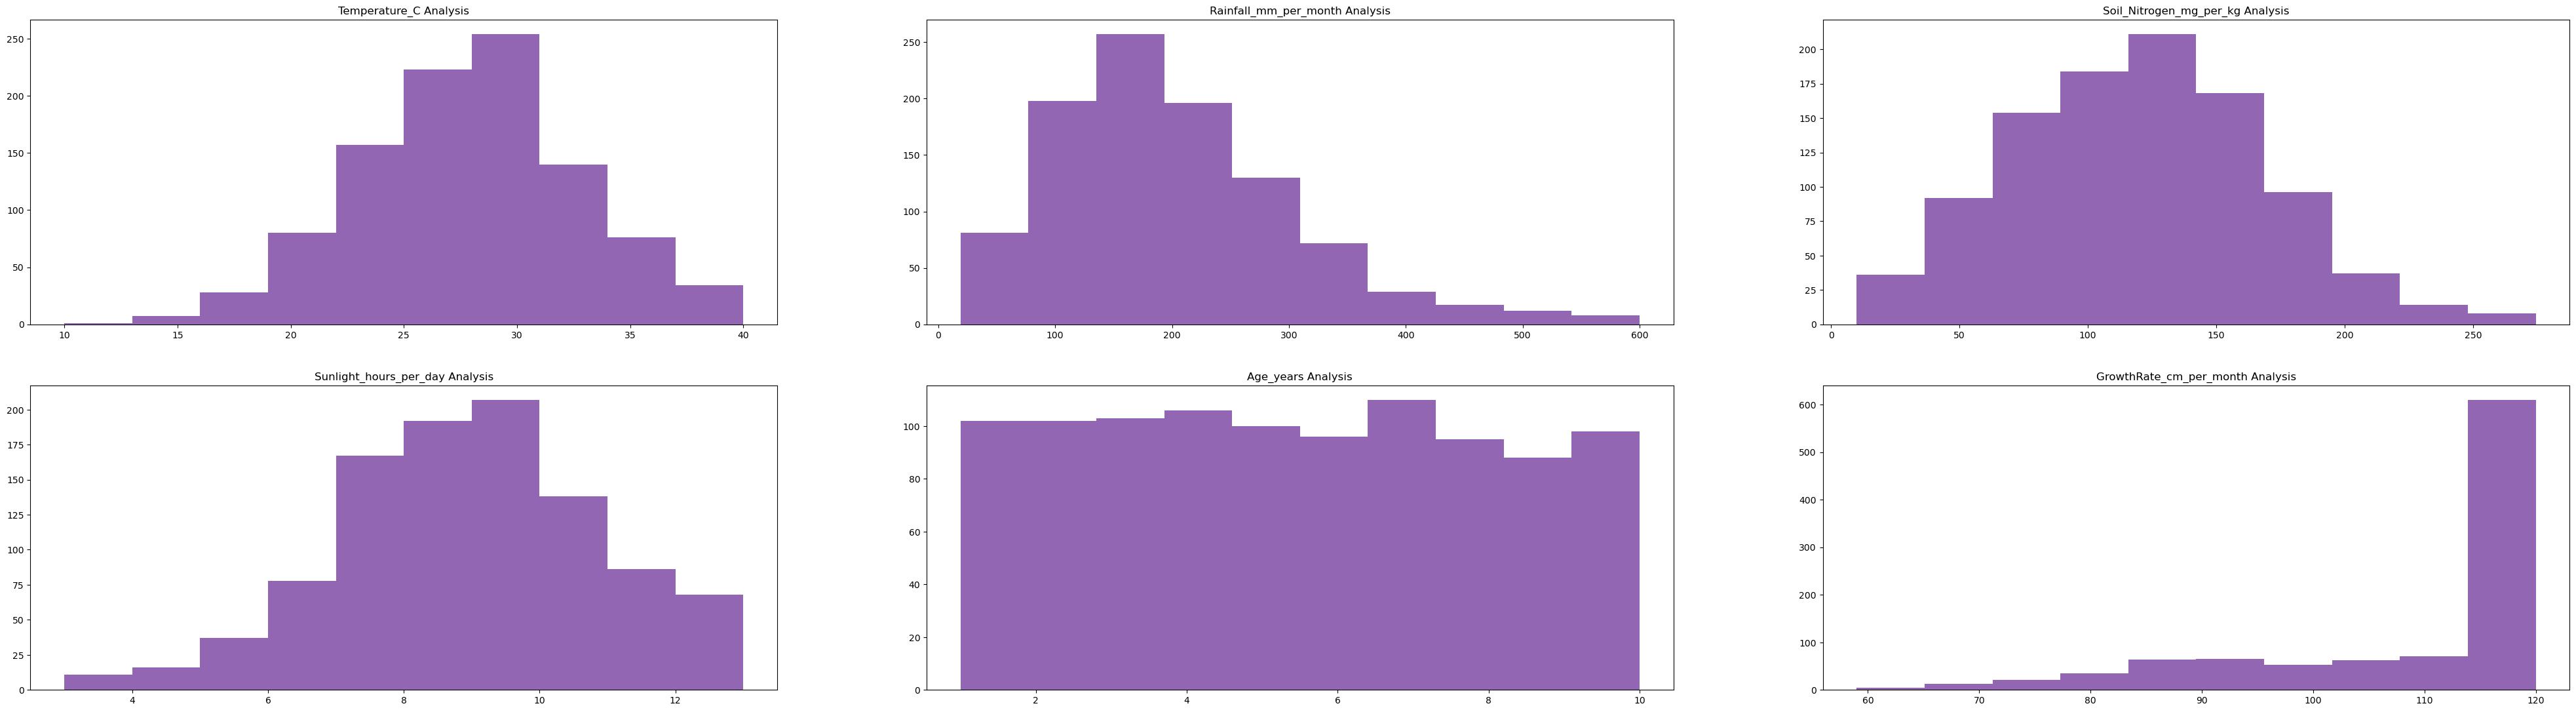

In [6]:
plt.figure(figsize = (50,35))
for i,j in enumerate(df.columns):
    plt.subplot(5,3, i+1)
    plt.hist(df[j],color = 'indigo', alpha = 0.6)
    plt.title(j + ' Analysis')
plt.show()

In [10]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MAE: {test_mae:.2f} cm/month")

# Make predictions
y_pred = model.predict(X_test)
print("First 5 Predictions:", y_pred[:5].flatten())
print("First 5 Actuals:", y_test.values[:5])

Test MAE: 12.48 cm/month
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
First 5 Predictions: [103.5475   105.056595 114.476204 103.5546   104.097305]
First 5 Actuals: [106.1 118.6 120.   71.   89.2]


In [ ]:
model.save("bamboo_growth_model.h5")